Inspired by 3Blues1brown videos
* [Partial differential equation](https://www.youtube.com/watch?v=ly4S0oi3Yz8)
* [Heat equation](https://www.youtube.com/watch?v=ToIXSwZ1pJU&list=RDCMUCYO_jab_esuFRV4b17AJtAw&index=3)
* [Fourier series](https://www.youtube.com/watch?v=r6sGWTCMz2k&t=897s)

# Heat equation

One-dimension heat equation, e.g., heat distribution (along x axis on a rod)

$\frac{\partial T}{\partial t}(x, t) = \alpha \frac{\partial^2 T}{\partial x^2} (x, t)$

where $T$ represents heat temperature; $x$ represents location along x axis; and $t$ represents time.

To solve heat equation, we need
* PDE, i.e., heat equation, to be solved
  * $\frac{\partial T}{\partial t}(x, t) = \alpha \frac{\partial^2 T}{\partial x^2} (x, t)$
* Boundary condition
  * Assumption: flat temperature at the boundaries for all $t$ > 0.
  * I.e., given a rod with ends at $x=0$ and $x=L$, then
    * $\frac{\partial T}{\partial x}(0,t) = \frac{\partial T}{\partial x}(L,t) = 0$
* Initial condition

Suppose the solution $T(x,t)$ is in an exponent cosine form:
$T(x,t) = A \cos(\omega x) e^{-\alpha \omega^2 t} + T_0$

This exponent cosine has this properties:
* $\frac{\partial T}{\partial t} = A \cos(\omega x) e^{-\alpha \omega^2 t} (-\alpha \omega^2)$
* $\frac{\partial^2 T}{\partial x^2} = A e^{-\alpha \omega^2 t} (-\omega^2) \cos(\omega x)$
* This makes LHS = RHS (of the heat equation).
  * Cosine has nice properties: flat at the end ($\frac{d \cos(x)}{d x}(0) = 0$) and closed differential form ( $\frac{d^2 \cos(x)}{d x^2} = - \cos(x)$ ).
  * Exponential also has nice properties: slowly delay ($e^{-t}$) and also closed differential form ( $\frac{d e^{-t}}{d t} = - e^{-t}$ ).

## Simple example



In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
def TempSim(x, t, w, a, A, To):
    '''
    Simple temperature model (exponential cosine)
    T = A cos(w x) e^(-a w^2 t) + To
    '''

    T = A * np.cos(w * x) * np.exp(-a * w**2 * t) + To
    return T

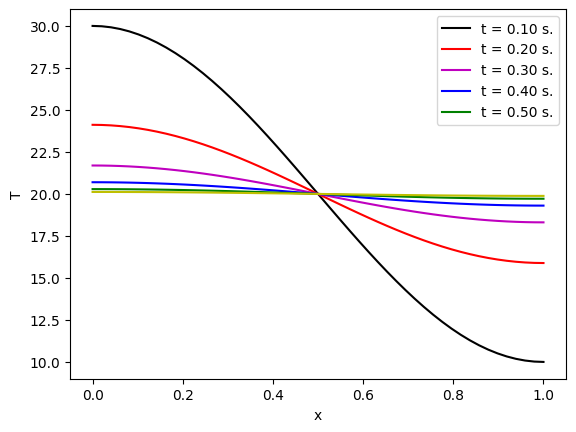

In [ ]:
L = 1
t = 0
w = np.pi
a = 0.9
A = 10
To = 20
xs = np.linspace(0, 1, 50)
plt.plot(xs, TempSim(xs, t, w, a, A, To), 'k')
plt.xlabel('x')
plt.ylabel('T')

ts = np.linspace(0.1, 0.5, 5)
s = ['r', 'm', 'b', 'g', 'y']
for i, t in enumerate(ts):
  plt.plot(xs, TempSim(xs, t, w, a, A, To), s[i])

plt.legend(["t = {:.2f} s.".format(t) for t in ts])


This simulates 1-dimensional heat distribution along a length $x$ of a iron rod.

## Animation

In [ ]:
from matplotlib.animation import FuncAnimation

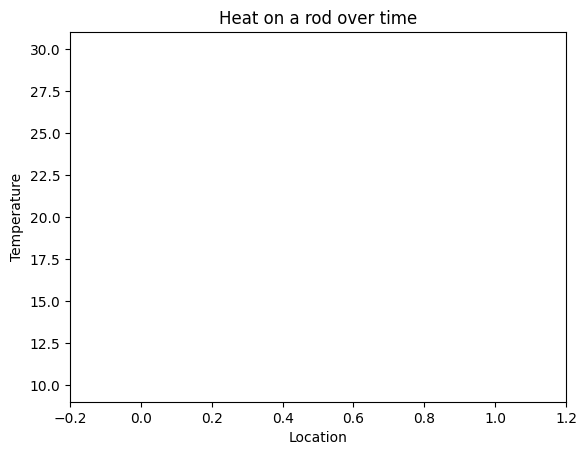

In [ ]:
    PTitle = "Heat on a rod over time"

    # Plot
    fig, ax = plt.subplots()
    xdata, ydata = [], []
    ln, = ax.plot([], [], 'r-')

    ax.set_ylabel('Temperature');
    ax.set_xlabel('Location');

    ax.title.set_text(PTitle)


    def init():
        ax.set_xlim(-0.2, 1.2)
        ax.set_ylim(9, 31)
        return ln,

    def update(frame):

        t = frame

        xs = np.linspace(0, 1, 50)
        Ts = TempSim(xs, t, w, a, A, To)

        ax.title.set_text(PTitle + ": t = {:e}".format(t))

        xdata = xs
        ydata = Ts
        ln.set_data(xdata, ydata)
        return ln,

    ts = np.linspace(0.01, 1, 20)
    ani = FuncAnimation(fig, update, frames=ts,
                        init_func=init,
                        interval=200, repeat_delay=1000, blit=True)
    plt.show()

In [ ]:
from IPython.display import HTML
HTML(ani.to_html5_video())

# Fourier series

$f(x) = \sum_{n=-\infty}^{\infty} c_n e^{2 n \pi i x}$

where
* $i = \sqrt{-1}$
* $n \in \{ \ldots, -3, -2, -1, 0, 1, 2, 3, \ldots \}$
* $c_0 = \int_0^1 f(x) dx $
* $c_k = \int_0^1 f(x) e^{-2 k \pi i x} dx $

Note

$e^{i \theta} = \cos(\theta) + i \sin(\theta)$

## ```fourier_approx```

In [50]:
def fourier_approx(x, N, cn):
    '''
    Approximate fourier series
    f(x) = \sum_{n=-N}^N c_n e^{2 n \pi i x}

    * cn must have 2*N + 1 elements
    * x: np.array shape (D,)
    '''

    x = x.reshape((-1,1))                            # K x 1
    nvec = np.arange(-N, N+1).reshape((-1,1))        # M x 1
    cn = cn.reshape((-1,1))                          # M x 1
    bases = np.exp(2*np.pi * 1j * np.dot(nvec, x.T)) # M x K

    f = np.dot(bases.T, cn)                          # K x 1

    return f.reshape((-1,))

In [ ]:
xs = np.linspace(0, 2*np.pi, 10)
cn = np.array([0, 0, 0, 0, 1, 1, 0.6, 0.3, 0.1])
N = int( (len(cn) - 1)/2 )

xf = fourier_approx(xs, N, cn)
print('xf=', xf)

xf= [3.        +0.j         0.47800978-0.51216486j 0.38992323+0.25505992j
 1.92037141+1.47816385j 0.58026616-0.97378368j 0.39948813+0.0176788j
 0.67304667+1.12282292j 1.59252305-1.52907049j 0.38415725-0.19883446j
 0.48726463+0.56618745j]


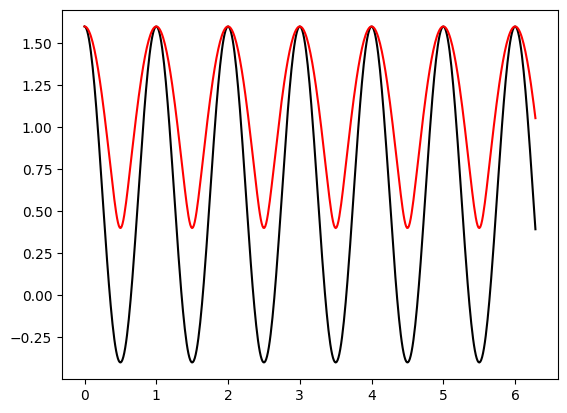

In [ ]:
xs = np.linspace(0, 2*np.pi, 500)
# cn = np.array([0, 0, 0, 0, 1, 1, 0.6, 0.3, 0.1])
cn = np.array([0, 0.6, 1])

N = int( (len(cn) - 1)/2 )

xf = fourier_approx(xs, N, cn)

plt.plot(xs, xf.real, 'k')
plt.plot(xs, np.absolute(xf), 'r')

## Determine coefficients

$c_k = \int_0^1 f(x) e^{-2 k \pi i x} dx$

Approximate with

$c_k = \sum_{x=0}^1 f(x) e^{-2 k \pi x} \Delta x$

## ```fourier_coeff```

In [49]:
def fourier_coeff(f, N, dx=0.01):
    '''
    Approximate fourier coefficients
    f: function with vectorization capability:
       * taking (K x 1) and returning (K x 1)

    return cn: np.array shape (2*N+1,)
    '''
    xs = np.linspace(0, 1, int(1/dx) + 1).reshape((-1,1))   # K x 1
    nvec = np.arange(-N, N+1).reshape((-1,1))               # M x 1

    fx = f(xs).reshape((-1,1))                              # K x 1

    Sel = np.exp(-2*np.pi* 1j * np.dot(nvec, xs.T)) * dx    # M x K

    cn = np.dot(Sel, fx)

    return cn.reshape((-1,))

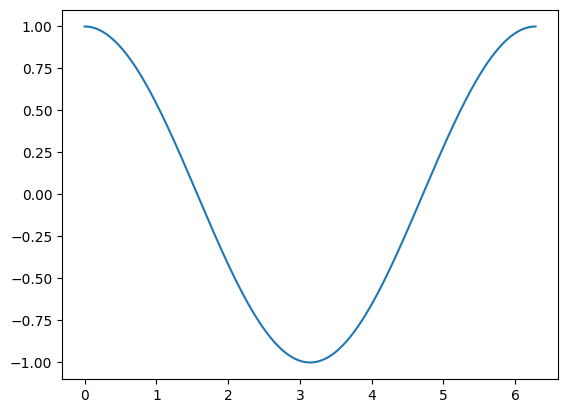

In [ ]:
f1 = lambda t: np.cos(t)

plt.plot(xs, f1(xs))

In [ ]:
cn = fourier_coeff(f1, 5, dx=0.001)
print(cn)

[-8.33720637e-05+0.01464627j -5.64200647e-04+0.01831883j
 -1.60490432e-03+0.02445583j -4.59255552e-03+0.03681423j
 -2.10985673e-02+0.07506433j  8.42241066e-01+0.j
 -2.10985673e-02-0.07506433j -4.59255552e-03-0.03681423j
 -1.60490432e-03-0.02445583j -5.64200647e-04-0.01831883j
 -8.33720637e-05-0.01464627j]


## Fourier approximation of an arbitrary function

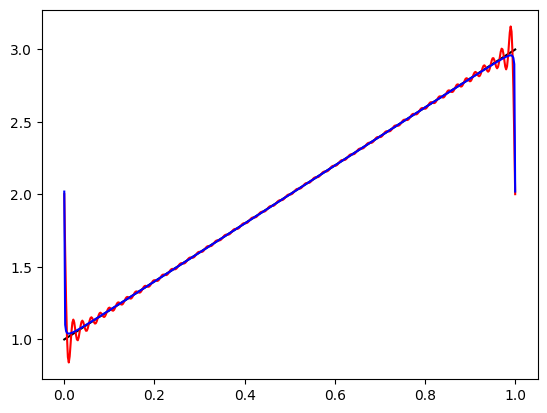

In [ ]:
N = 50
dx = 0.00001
f1 = lambda x: 2*x+1
# f1 = lambda x: np.sin(2*np.pi*x)

cn = fourier_coeff(f1, N, dx)

xs = np.linspace(0, 1, 500)
xf = fourier_approx(xs, N, cn)
# print('xf=', xf)

plt.plot(xs, f1(xs), 'k')
plt.plot(xs, xf.real, 'r')

N = 500
cn = fourier_coeff(f1, N, dx)
xf = fourier_approx(xs, N, cn)
plt.plot(xs, xf.real, 'b')



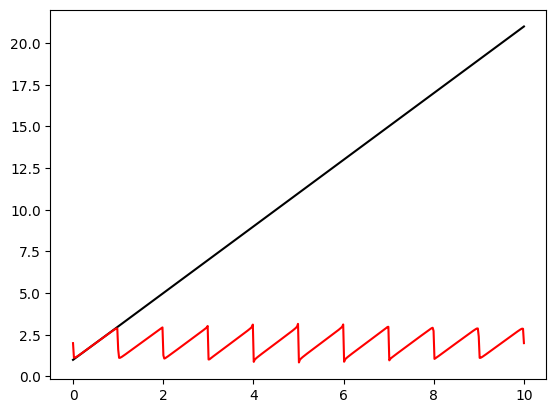

In [ ]:
N = 50
dx = 0.00001
f1 = lambda x: 2*x+1
# f1 = lambda x: np.sin(2*np.pi*x)


cn = fourier_coeff(f1, N, dx)

xs = np.linspace(0, 10, 500)
xf = fourier_approx(xs, N, cn)
# print('xf=', xf)

plt.plot(xs, f1(xs), 'k')
plt.plot(xs, xf.real, 'r')
# plt.plot(xs, np.absolute(xf), 'b:')


If $x$ goes beyond 1, we will see periodic nature of the Fourier approximation.

# Heat equation revisitation

Suppose solution is in the form:

$T(x, t) = \sum_{n=-\infty}^\infty c_n e^{2 n \pi i x} e^{- \alpha (2 n \pi)^2 t}$

Recall
* LHS: $\frac{\partial T}{\partial t} = \sum_{n=-\infty}^\infty c_n e^{2 n \pi i x} e^{- \alpha (2 n \pi)^2 t} \cdot (- \alpha (2 n \pi)^2)$
* RHS: $\alpha \frac{\partial^2 T}{\partial x^2} = \alpha \sum_{n=-\infty}^\infty c_n e^{2 n \pi i x} e^{- \alpha (2 n \pi)^2 t} \cdot (2 n \pi i)^2$
* That is, LHS = RHS. The solution agrees with the heat equation. (Otherwise, it cannot be a solution.)

# One-dimension example

Given the initial condition $T(x, 0) = 10 + 20 x$ from $x \in [0, 1]$, find $T(x, t)$.





* Approximate heat solution
  * $T(x, t) = \sum_{n=-\infty}^\infty c_n e^{2 n \pi i x} e^{- \alpha (2 n \pi)^2 t}$ with Fourier series $T'(x,t)$

  * $T'(x, t) = \sum_{n=-N}^N c_n e^{2 n \pi i x} e^{- \alpha (2 n \pi)^2 t}$


Hence,

$$T'(x,0) = \sum_{n=-N}^N c_n e^{2 n \pi i x}$$

Recall that $f(x) = \sum_{n=-\infty}^{\infty} c_n e^{2 n \pi i x}$ is Fourier series.

Hence, $T(x,0)$ is also a Fourier series and $T'(x,0)$ is its Fourier approximation.

## Fourier approximation

Solve for $c_n$'s.

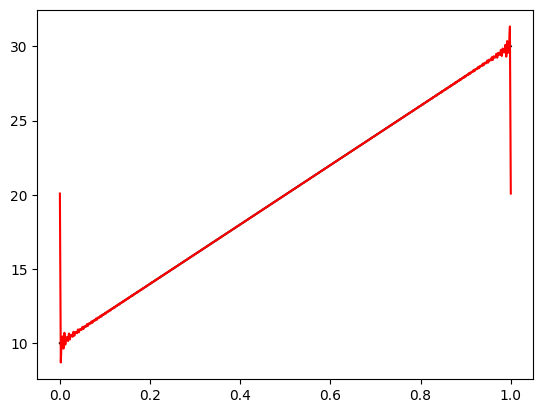

In [ ]:
N = 200
dx = 0.00001
Tx0 = lambda x: 10 + 20*x

cn = fourier_coeff(Tx0, N, dx)

xs = np.linspace(0, 1, 500)
xf = fourier_approx(xs, N, cn)
# print('xf=', xf)

plt.plot(xs, Tx0(xs), 'k')
plt.plot(xs, xf.real, 'r')

## Solve for alpha

We need another condition to solve for $\alpha$ in $T(x, t) = \sum_{n=-\infty}^\infty c_n e^{2 n \pi i x} e^{- \alpha (2 n \pi)^2 t}$

Suppose we have $T(x_0, t_0) = \tau$.

Hence,
$0 = \sum_{n=-\infty}^\infty c_n e^{2 n \pi i x_0} e^{- \alpha (2 n \pi)^2 t_0} - \tau$



Frame this problem as optimization

$\alpha = \arg\min_a \left(\sum_{n=-\infty}^\infty c_n e^{2 n \pi i x_0} e^{- a (2 n \pi)^2 t_0} - \tau \right)^2$

## ```Temperature```

In [ ]:
def Temperature(x, t, cn, alpha):
    '''
    Approximate T(x,t)
    T'(x,t) = \sum_{n=-N}^N c_n e^{2 n \pi i x} e^{-alpha (2 n \pi)^2 t}

    * cn must have 2*N + 1 elements
    * x: np.array shape (D,)
    * t: np.array shape (K,)

    return T' : np.array shape (D, K)
    '''

    x = np.array(x).reshape((-1,1))                                  # D x 1
    t = np.array(t).reshape((-1,1))                                  # K x 1
    nvec = np.arange(-N, N+1).reshape((-1,1))              # M x 1

    cn = cn.reshape((-1,1))                                # M x 1
    ex = np.exp(2*np.pi * 1j * np.dot(nvec, x.T))          # M x D
    et = np.exp(-alpha*4*np.pi**2 * np.dot(nvec**2, t.T))  # M x K

    cex = cn * ex                                          # M x D, Broadcast

    Tp = np.dot(cex.T, et)                                 # D x K

    return Tp

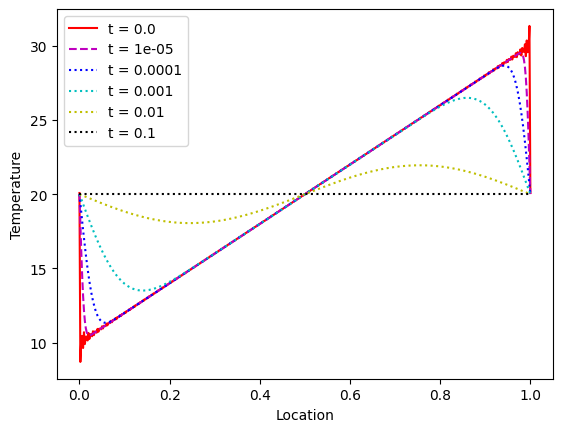

In [ ]:
# Test Temperature

N = 200
dx = 0.00001
Tx0 = lambda x: 10 + 20*x

cn = fourier_coeff(Tx0, N, dx)
# print('cn =', cn)

xs = np.linspace(0, 1, 500)
ts = np.array([0, 0.00001, 0.0001, 0.001, 0.01, 0.1])

a = 3 # Guess, just to test Temperature function
Tmat = Temperature(xs, ts, cn, a)

plt.plot(xs, Tmat[:,0].real, 'r')
plt.plot(xs, Tmat[:,1].real, 'm--')
plt.plot(xs, Tmat[:,2].real, 'b:')
plt.plot(xs, Tmat[:,3].real, 'c:')
plt.plot(xs, Tmat[:,4].real, 'y:')
plt.plot(xs, Tmat[:,5].real, 'k:')

plt.xlabel('Location')
plt.ylabel('Temperature')
plt.legend(['t = {}'.format(t) for t in ts])

In [ ]:
# def Temperature(x, t, cn, alpha):
#     '''
#     T'(x,t) = sum_{n=-N}^N c_n exp(2 n pi i x) exp(-alpha (2 n pi)^2 t)
#     x : float
#     t : float
#     '''

#     N21, _ = cn.shape
#     N = (N21 - 1)/2
#     ns = np.arange(-N, N+1)
#     fterms = np.multiply(np.exp(2 * ns * np.pi * 1j * x),
#                          np.exp(-alpha * (2 * ns * np.pi)**2 * t))
#     cterms = np.multiply(cn, fterms)
#     Tp = np.sum(cterms)

#     return Tp

With approximation

$\alpha \approx \arg\min_a \left(\sum_{n=-N}^N c_n e^{2 n \pi i x_0} e^{- a (2 n \pi)^2 t_0} - \tau \right)^2$

In [ ]:
def lossf(a, cn, x0, t0, tau):
    E = (Temperature(x0, t0, cn, a)[0,0] - tau)**2
    return np.abs(E)


In [ ]:
# Test
lossf(3, cn, 0, 0, 10)

101.60639999998729

In [ ]:
from scipy.optimize import minimize

In [ ]:
x0 = 0.2
t0 = 0.1
tau = 16

Loss = lambda a: lossf(a, cn, x0, t0, tau)

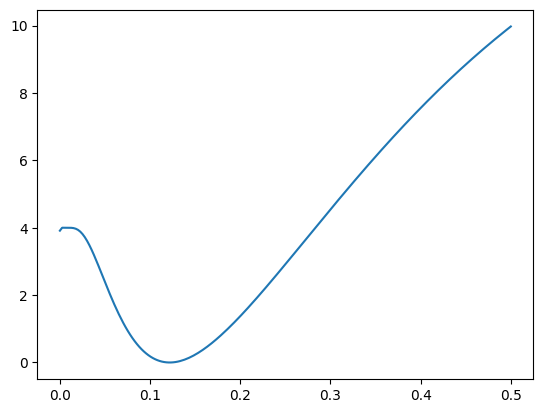

In [ ]:
avals = np.linspace(0, 0.5, 200)

plt.plot(avals, [Loss(a) for a in avals])

In [ ]:
# Initial value
a0 = 0.1 #np.random.normal(0, 1)

res = minimize(Loss, a0, method='nelder-mead',
               options={'xatol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 23
         Function evaluations: 46


In [ ]:
res.x

array([0.12177155])

In [ ]:
alpha = res.x[0]

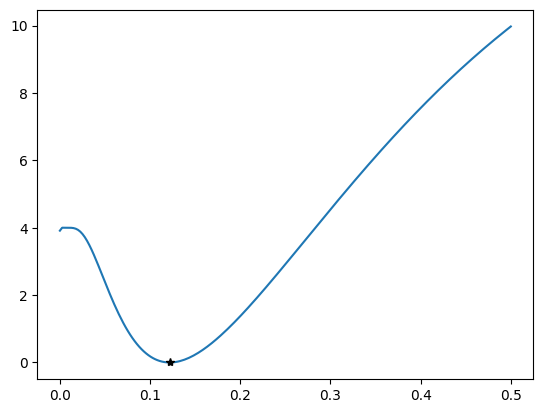

In [ ]:
plt.plot(avals, [Loss(a) for a in avals])
plt.plot(alpha, Loss(alpha), 'k*')

## Simulation

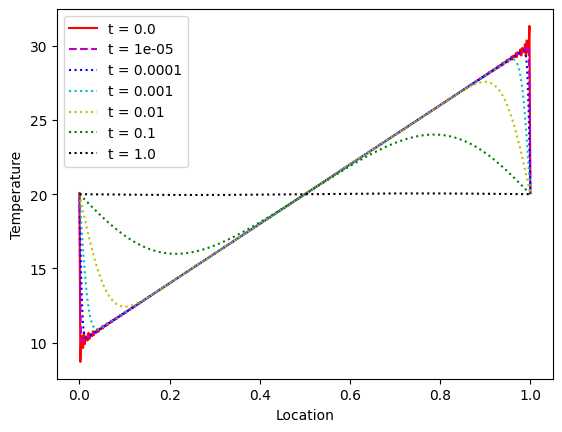

In [ ]:
N = 200
dx = 0.00001
Tx0 = lambda x: 10 + 20*x

cn = fourier_coeff(Tx0, N, dx)
# print('cn =', cn)

xs = np.linspace(0, 1, 500)
ts = np.array([0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1])

a = alpha
Tmat = Temperature(xs, ts, cn, a)

plt.plot(xs, Tmat[:,0].real, 'r')
plt.plot(xs, Tmat[:,1].real, 'm--')
plt.plot(xs, Tmat[:,2].real, 'b:')
plt.plot(xs, Tmat[:,3].real, 'c:')
plt.plot(xs, Tmat[:,4].real, 'y:')
plt.plot(xs, Tmat[:,5].real, 'g:')
plt.plot(xs, Tmat[:,6].real, 'k:')

plt.xlabel('Location')
plt.ylabel('Temperature')
plt.legend(['t = {}'.format(t) for t in ts])

## Animation

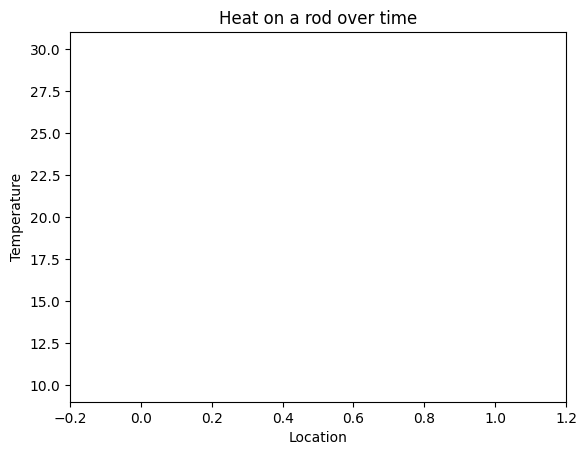

In [ ]:
    PTitle = "Heat on a rod over time"

    # Plot
    fig, ax = plt.subplots()
    xdata, ydata = [], []
    ln, = ax.plot([], [], 'r-')

    ax.set_ylabel('Temperature');
    ax.set_xlabel('Location');

    ax.title.set_text(PTitle)


    def init():
        ax.set_xlim(-0.2, 1.2)
        ax.set_ylim(9, 31)
        return ln,

    def update(frame):

        t = frame

        xs = np.linspace(0, 1, 500)
        a = alpha
        Ts = Temperature(xs, t, cn, a)

        ax.title.set_text(PTitle + ": t = {:e}".format(t))

        xdata = xs
        ydata = Ts
        ln.set_data(xdata, ydata)
        return ln,

    ts = np.linspace(0, 1, 100)
    ani = FuncAnimation(fig, update, frames=ts,
                        init_func=init,
                        interval=100, repeat_delay=1000, blit=True)
    plt.show()

In [ ]:
from IPython.display import HTML
HTML(ani.to_html5_video())

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


# Fourier to draw


In [2]:
np.floor(5.4)

5.0

In [3]:
np.ceil(5.4)

6.0

In [7]:
np.min([5, 4])

4

In [55]:
# Lead function f(x)

def scaffolding(x):
    '''
    x: [0,1] tracing the entire draw
    linear implementation
    return location on a complex plane, i.e., (a + bj)
    '''

    Ps = [2+6j, 1.7+6.8j, 1.5+7j, 1.3+6.5j, 1.1+5.6j, 1+4.8j, 1.02+4.5j,
          1.1+4.2j, 1.2+3.9j, 2+1j,
          2.8+3.9j, 2.9+4.2j, 2.98+4.5j, 3+4.8j, 2.9+5.6j, 2.7+6.5j, 2.5+7j,
          2.3+6.8j, 2+6j]

    N = len(Ps)
    Nx = (N-1) * x

    # print('Debug: Nx=', Nx)

    i0 = int(np.floor(Nx))
    i1 = int(np.ceil(Nx))
    r  = Nx - i0

    z0 = Ps[i0]
    z1 = Ps[i1]

    z = z0 + (z1 - z0) * r

    return z

(0.0, 8.0)

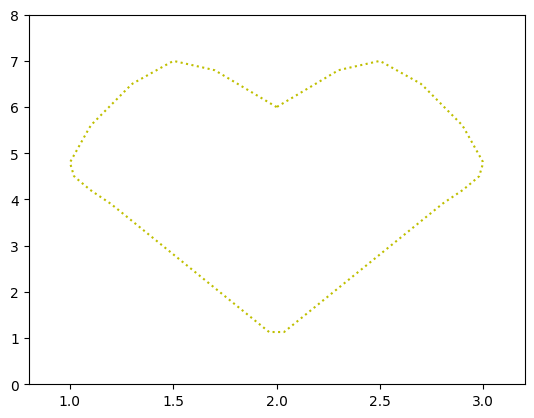

In [56]:
xs = np.linspace(0, 1, 200)
zs = np.array([scaffolding(x) for x in xs])

plt.plot(zs.real, zs.imag, 'y:')
plt.xlim((0.8, 3.2))
plt.ylim((0, 8))

In [58]:
def fourier_coeff_caveman(f, N, dx=0.01):
    '''
    Approximate fourier coefficients
    f: function : caveman version
       * taking float and returning float

    return cn: np.array shape (2*N+1,)
    '''
    xs = np.linspace(0, 1, int(1/dx) + 1).reshape((-1,1))   # K x 1
    nvec = np.arange(-N, N+1).reshape((-1,1))               # M x 1

    fx = np.array([f(x) for x in xs]).reshape((-1,1))       # K x 1

    Sel = np.exp(-2*np.pi* 1j * np.dot(nvec, xs.T)) * dx    # M x K

    cn = np.dot(Sel, fx)

    return cn.reshape((-1,))

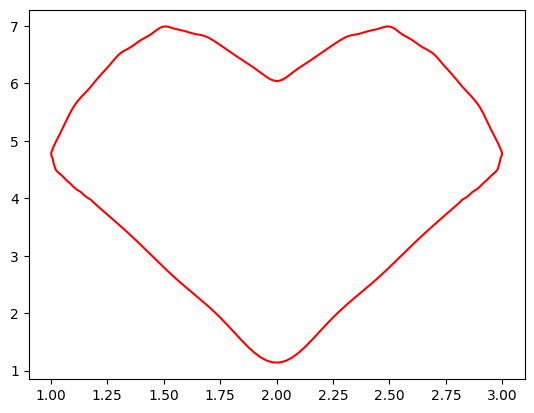

In [64]:
N = 40
dx = 0.00001

cn = fourier_coeff_caveman(scaffolding, N, dx)

xs = np.linspace(0, 1, 500)
xf = fourier_approx(xs, N, cn)
# print('xf=', xf)

plt.plot(xf.real, xf.imag, 'r')

### Animation

In [66]:
from matplotlib.animation import FuncAnimation

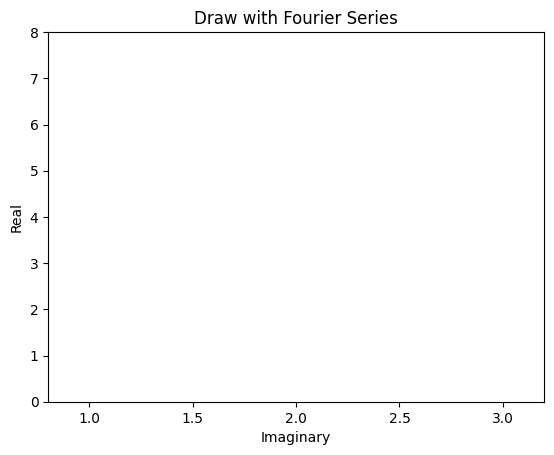

In [76]:
    PTitle = "Draw with Fourier Series"

    # Plot
    fig, ax = plt.subplots()
    xdata, ydata = [], []
    ln, = ax.plot([], [], 'r:')

    ax.set_ylabel('Real');
    ax.set_xlabel('Imaginary');

    ax.title.set_text(PTitle)


    def init():
        ax.set_xlim(0.8, 3.2)
        ax.set_ylim(0, 8)
        return ln,

    def update(frame):

        N = frame
        ax.title.set_text(PTitle + ": N = {}".format(N))

        dx = 0.00001
        cn = fourier_coeff_caveman(scaffolding, N, dx)

        xs = np.linspace(0, 1, 500)
        xf = fourier_approx(xs, N, cn)

        xdata = xf.real
        ydata = xf.imag
        ln.set_data(xdata, ydata)
        return ln,

    Ns = np.arange(1, 40)
    ani = FuncAnimation(fig, update, frames=Ns,
                        init_func=init,
                        interval=100, repeat_delay=1000, blit=True)
    plt.show()

In [77]:
from IPython.display import HTML
HTML(ani.to_html5_video())

# End